In [7]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import pickle

import numpy as np

WDIR = os.environ['DM21CM_DIR']
sys.path.append(WDIR)
import dm21cm.physics as phys

sys.path.append(os.environ['DH_DIR'])

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
from matplotlib.ticker import FixedLocator, FixedFormatter
mpl.rc_file(f"{WDIR}/matplotlibrc")

## 0. plotting

In [2]:
label_dict = {
    'dc' : 'DM21cm',
    'dh' : 'DarkHistory',
    '21' : '21cmFAST',
    'heat' : 'Heating',
    'exc' : 'Excitation',
    'ion' : 'Ionization',
}
color_dict = {
    'dc' : 'k',
    'dh' : cms['binary'](0.4),
    '21' : 'k',
    'heat' : mpl.colors.to_rgb('r'),
    'exc' : mpl.colors.to_rgb('b'),
    'ion' : mpl.colors.to_rgb('g'),
}
ls_dict = {
    'dc' : '-',
    'dh' : '--',
    '21' : '-',
}

z_plot_max = 45.
z_plot_min = 5.

## 1. Adiabatic (no injection)

In [83]:
dc_run_name = 'xc_noLX_nos8_noHe_nosp'
dh_run_name = 'xc_noHe'
save_name = 'xc_noHe_nos8'

In [80]:
dc_run_name = 'xc_noLX_nos8_noHe_nosp_zf001'
dh_run_name = 'xc_noHe_zf001'
save_name = 'xc_noHe_nos8_zf001'

In [86]:
dc_run_name = 'xc_noLX_noHe_nosp'
dh_run_name = 'xc_noHe'
save_name = 'xc_noHe'

In [89]:
dc_run_name = 'xc_noLX'
dh_run_name = 'xc_base'
save_name = 'xc_base'

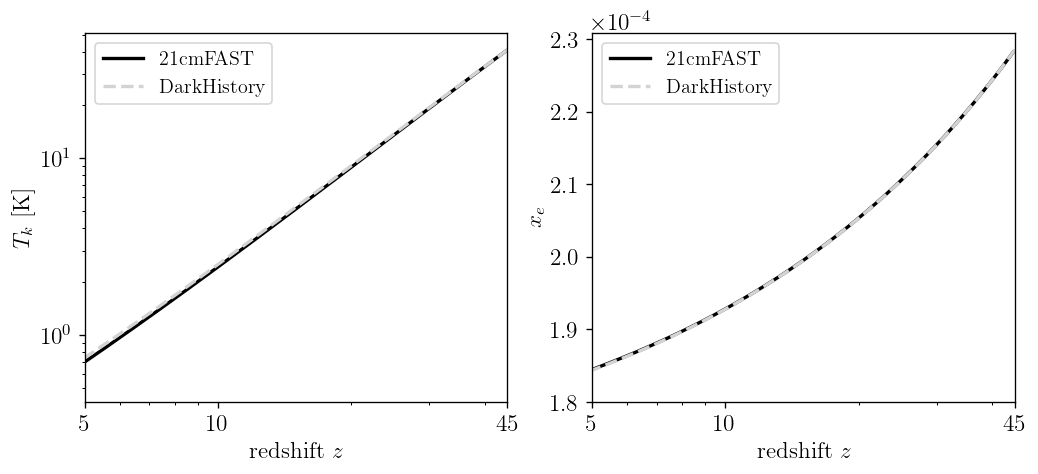

In [90]:
dc_soln = np.load(f'{WDIR}/outputs/dm21cm/{dc_run_name}_records.npy', allow_pickle=True).item()
dh_soln = pickle.load(open(f'{WDIR}/outputs/dh/{dh_run_name}_soln.p', 'rb'))
i_z_st_dh = np.argmin(np.abs(dh_soln['rs']-1 - z_plot_max))

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Tk
ax = axs[0]
ax.plot(dc_soln['z'], dc_soln['T_k'], color=color_dict['21'], label=label_dict['21'], ls=ls_dict['21'], lw=2)
#ax.plot(dc_soln['z'][0], dc_soln['T_k'][0], color=color_dict['21'], marker='+', ms=7, zorder=10)
ax.plot(dh_soln['rs'][i_z_st_dh:] - 1, dh_soln['Tm'][i_z_st_dh:]/phys.kB, color=color_dict['dh'], label=label_dict['dh'], ls=ls_dict['dh'], lw=2)
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log', yscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(xlabel='redshift $z$', ylabel='$T_k$ [K]')
ax.legend()

# x
ax = axs[1]
ax.plot(dc_soln['z'], dc_soln['x_e'], color=color_dict['21'], label=label_dict['21'], ls=ls_dict['21'], lw=2)
#ax.plot(dc_soln['z'][0], dc_soln['x_e'][0], color=color_dict['21'], marker='+', ms=7, zorder=10)
ax.plot(dh_soln['rs'][i_z_st_dh:] - 1, dh_soln['x'][i_z_st_dh:, 0], color=color_dict['dh'], label=label_dict['dh'], ls=ls_dict['dh'], lw=2)
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(xlabel='redshift $z$', ylabel='$x_e$')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.legend()

fig.savefig(f'{save_name}.pdf', bbox_inches='tight')

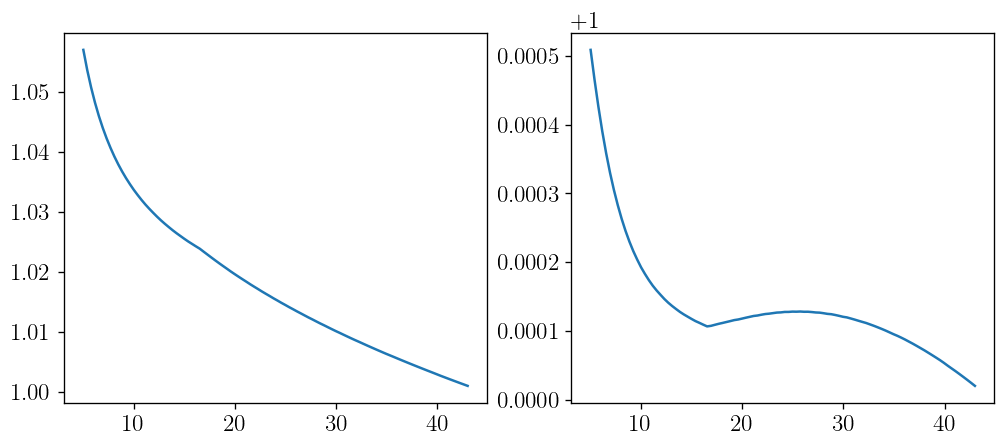

In [91]:
# relative error: not formatted
z_s = np.linspace(5, 43, 100)
T_21_s = np.interp(z_s, dc_soln['z'][::-1], dc_soln['T_k'][::-1])
T_dh_s = np.interp(z_s, dh_soln['rs'][::-1] - 1, dh_soln['Tm'][::-1]/phys.kB)

x_21_s = np.interp(z_s, dc_soln['z'][::-1], dc_soln['x_e'][::-1])
x_dh_s = np.interp(z_s, dh_soln['rs'][::-1] - 1, dh_soln['x'][::-1, 0])

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(z_s, T_dh_s/T_21_s)
axs[1].plot(z_s, x_21_s/x_dh_s)

## 2. Homogeneous injection

### 2.1 photon comparisons

In [ ]:
dc_run_name = 'xc_phph_noLX_nos8_noHe_nosp_lifetime25_zf001'
dh_run_name = 'xc_phph_noHe_lifetime25_zf001'
save_name = 'xc_phph_nos8_noHe_nosp_lifetime25_zf001'

In [ ]:
dc_run_name = 'xc_phph_noLX_nos8_noHe_nosp_lifetime25'
dh_run_name = 'xc_phph_noHe_lifetime25'
save_name = 'xc_phph_nos8_noHe_nosp_lifetime25'

In [15]:
dc_run_name = 'xc_phph_noLX_nos8_noHe_lifetime25'
dh_run_name = 'xc_phph_noHe_lifetime25'
save_name = 'xc_phph_nos8_noHe_lifetime25'

In [6]:
dc_run_name = 'xc_phph_noLX_nos8_lifetime25'
dh_run_name = 'xc_phph_lifetime25'
save_name = 'xc_phph_nos8_lifetime25'

In [27]:
dc_run_name = 'xc_phph_noLX_nopop2_lifetime25'
dh_run_name = 'xc_phph_lifetime25'
save_name = 'xc_phph_nopop2_lifetime25'

In [24]:
dc_run_name = 'xc_phph_noLX_lifetime25'
dh_run_name = 'xc_phph_lifetime25'
save_name = 'xc_phph_lifetime25'

### 2.2 electron comparisons

In [26]:
dc_run_name = 'xc_ee_noLX_nos8_lifetime26'
dh_run_name = 'xc_ee_lifetime26'
save_name = 'xc_ee_nos8_lifetime26'

In [29]:
dc_run_name = 'xc_ee_noLX_lifetime26'
dh_run_name = 'xc_ee_lifetime26'
save_name = 'xc_ee_lifetime26'

In [37]:
# for photon tests
dc_run_name = 'xc_ee_noLX_lifetime26_defaultDH'
dh_run_name = 'xc_ee_lifetime26'
save_name = 'xc_ee_lifetime26_defaultDH'

In [13]:
from scipy import interpolate

def extrapolate_first_n(z, arr, n):
    interp = interpolate.interp1d(z[n:], arr[n:], kind='linear', bounds_error=False, fill_value='extrapolate')
    arr_first_n = interp(z[:n])
    return np.concatenate((arr_first_n, arr[n:]))

/tmp/ipykernel_1461691/2016639710.py:46: RuntimeWarning: invalid value encountered in divide
  ax.plot((dc_soln['z']), f_func(dc_soln['dep_'+f_label]/dc_dep_tot), color=color_dict[f_label], ls=ls_dict['21'], lw=2, label=label_dict[f_label])


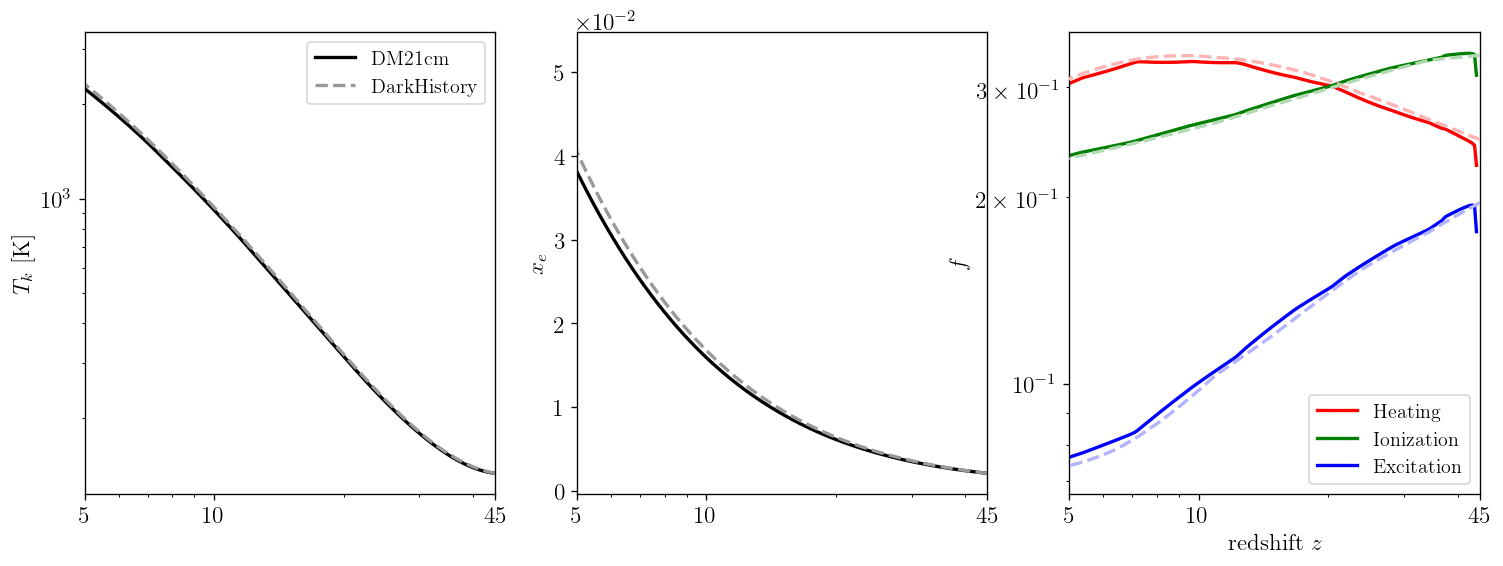

In [39]:
dc_soln = np.load(f'{WDIR}/outputs/dm21cm/{dc_run_name}_records.npy', allow_pickle=True).item()
dh_soln = pickle.load(open(f'{WDIR}/outputs/dh/{dh_run_name}_soln.p', 'rb'))
i_z_st_dh = np.argmin(np.abs(dh_soln['rs']-1 - z_plot_max))

def blend_white(c, alpha=0.7):
    white = np.array([1., 1., 1.])
    return tuple((1-alpha)*np.array(c) + alpha*white)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Tk
ax = axs[0]
ax.plot(dc_soln['z'], dc_soln['T_k'], color=color_dict['dc'], label=label_dict['dc'], ls=ls_dict['dc'], lw=2)
#ax.plot(dc_soln['z'][0], dc_soln['T_k'][0], color=color_dict['21'], marker='+', ms=7, zorder=10)
ax.plot(dh_soln['rs'][i_z_st_dh:] - 1, dh_soln['Tm'][i_z_st_dh:]/phys.kB, color=color_dict['dh'], label=label_dict['dh'], ls=ls_dict['dh'], lw=2)
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log', yscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(ylabel='$T_k$ [K]')
ax.legend()

# x
ax = axs[1]
ax.plot(dc_soln['z'], dc_soln['x_e'], color=color_dict['dc'], label=label_dict['dc'], ls=ls_dict['dc'], lw=2)
#ax.plot(dc_soln['z'][0], dc_soln['x_e'][0], color=color_dict['21'], marker='+', ms=7, zorder=10)
ax.plot(dh_soln['rs'][i_z_st_dh:] - 1, dh_soln['x'][i_z_st_dh:, 0], color=color_dict['dh'], label=label_dict['dh'], ls=ls_dict['dh'], lw=2)
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(ylabel='$x_e$')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

# f
#f_func = lambda x: extrapolate_first_n(dc_soln['z'], x, 6)
f_func = lambda x: x

ax = axs[2]
dh_fheat_s = dh_soln['f']['low']['heat'] + dh_soln['f']['high']['heat']
dh_fion_s = dh_soln['f']['low']['H ion'] + dh_soln['f']['high']['H ion'] + dh_soln['f']['low']['He ion'] + dh_soln['f']['high']['He ion']
dh_fexc_s = dh_soln['f']['low']['exc'] + dh_soln['f']['high']['exc']
dc_dep_tot = dc_soln['dE_inj_per_Bavg_unclustered']

for f_label, dh_f_s in zip(['heat', 'ion', 'exc'], [dh_fheat_s, dh_fion_s, dh_fexc_s]):
    color = color_dict[f_label]
    ax.plot(dh_soln['rs'][i_z_st_dh:] - 1, dh_f_s[i_z_st_dh:], color=blend_white(color), lw=2, ls='--', zorder=10)
    ax.plot((dc_soln['z']), f_func(dc_soln['dep_'+f_label]/dc_dep_tot), color=color_dict[f_label], ls=ls_dict['21'], lw=2, label=label_dict[f_label])
    
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log', yscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(xlabel='redshift $z$', ylabel=r'$f$')
ax.legend()

fig.savefig(f'{save_name}.pdf', bbox_inches='tight')

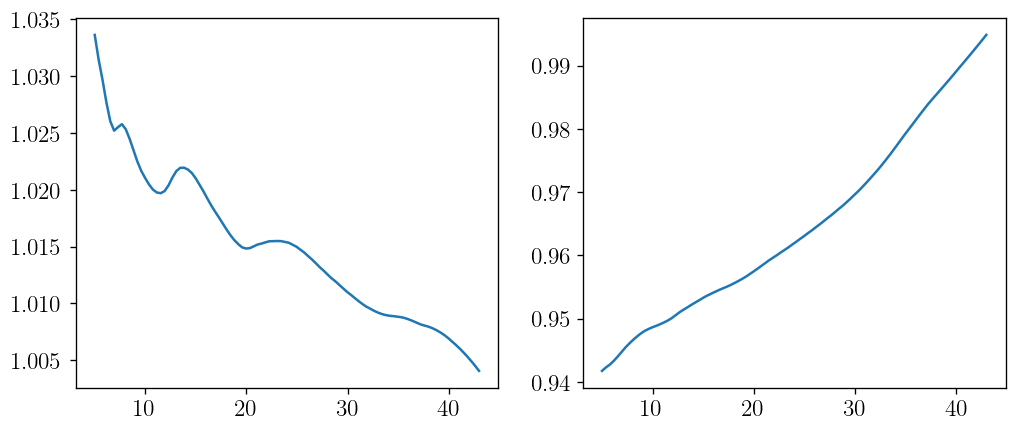

In [31]:
# relative error: not formatted
z_s = np.linspace(5, 43, 100)
T_21_s = np.interp(z_s, dc_soln['z'][::-1], dc_soln['T_k'][::-1])
T_dh_s = np.interp(z_s, dh_soln['rs'][::-1] - 1, dh_soln['Tm'][::-1]/phys.kB)

x_21_s = np.interp(z_s, dc_soln['z'][::-1], dc_soln['x_e'][::-1])
x_dh_s = np.interp(z_s, dh_soln['rs'][::-1] - 1, dh_soln['x'][::-1, 0])

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(z_s, T_dh_s/T_21_s)
axs[1].plot(z_s, x_21_s/x_dh_s)

## 3. Xray

### 3.1 VDH

In [11]:
dc_run_name = 'xc_xray_noLX_nos8_noHe_nosp'
dh_run_name = 'xc_xrayST_noHe'
save_name = 'xc_xrayVDH_nos8_noHe_nosp'

In [14]:
dc_run_name = 'xc_xray_noLX_nopop2_noHe_nosp'
dh_run_name = 'xc_xrayST_noHe'
save_name = 'xc_xrayVDH_nopop2_noHe_nosp'

In [17]:
dc_run_name = 'xc_xray_noLX_nopop2'
dh_run_name = 'xc_xrayST'
save_name = 'xc_xrayVDH_nopop2'

In [20]:
dc_run_name = 'xc_xray_noLX'
dh_run_name = 'xc_xrayST'
save_name = 'xc_xrayVDH'

/tmp/ipykernel_554949/1175195791.py:54: RuntimeWarning: invalid value encountered in divide
  ax.plot(dc_soln['z'], dc_soln['dep_'+f_label]/dc_dep_tot, color=color_dict[f_label], ls=ls_dict['21'], lw=2, label=label_dict[f_label])


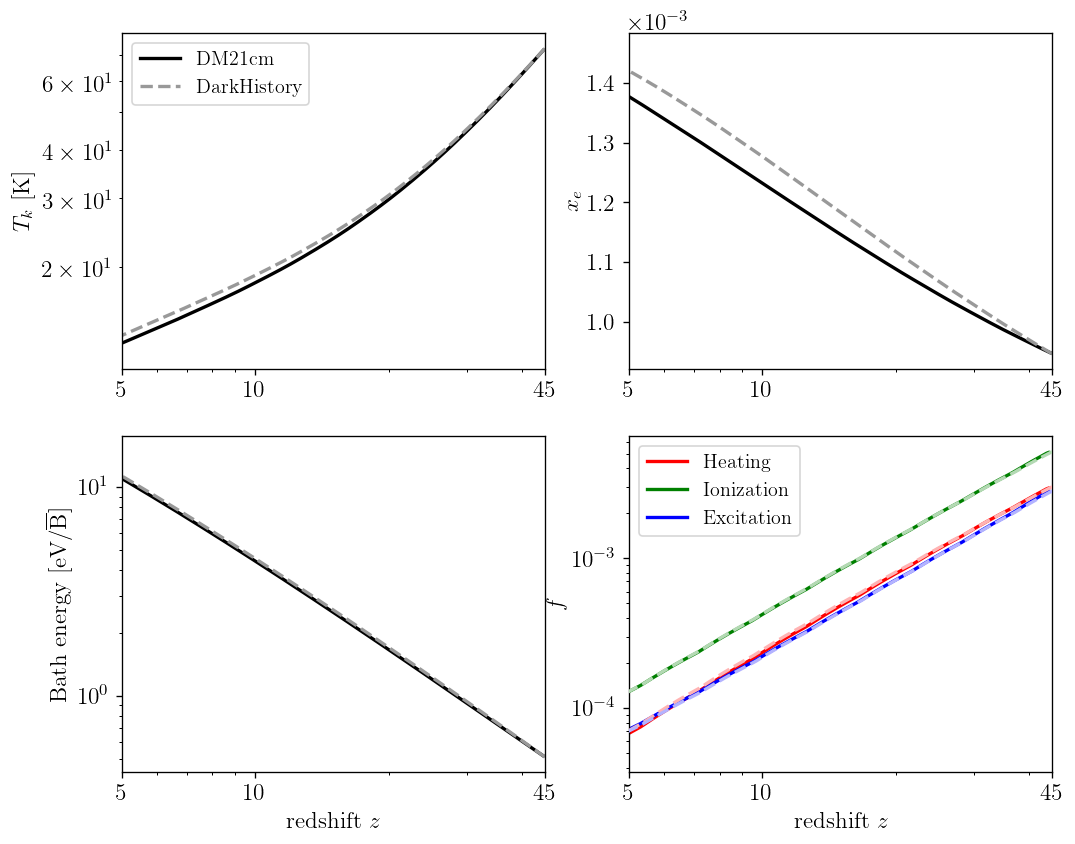

In [ ]:
dc_soln = np.load(f'{WDIR}/outputs/dm21cm/{dc_run_name}_records.npy', allow_pickle=True).item()
dh_soln = pickle.load(open(f'{WDIR}/outputs/dh/{dh_run_name}_soln.p', 'rb'))
i_z_st_dh = np.argmin(np.abs(dh_soln['rs']-1 - z_plot_max))

def blend_white(c, alpha=0.7):
    white = np.array([1., 1., 1.])
    return tuple((1-alpha)*np.array(c) + alpha*white)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Tk
ax = axs[0,0]
ax.plot(dc_soln['z'], dc_soln['T_k'], color=color_dict['dc'], label=label_dict['dc'], ls=ls_dict['dc'], lw=2)
#ax.plot(dc_soln['z'][0], dc_soln['T_k'][0], color=color_dict['21'], marker='+', ms=7, zorder=10)
ax.plot(dh_soln['rs'][i_z_st_dh:] - 1, dh_soln['Tm'][i_z_st_dh:]/phys.kB, color=color_dict['dh'], label=label_dict['dh'], ls=ls_dict['dh'], lw=2)
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log', yscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(ylabel='$T_k$ [K]')
ax.legend()

# x
ax = axs[0,1]
ax.plot(dc_soln['z'], dc_soln['x_e'], color=color_dict['dc'], label=label_dict['dc'], ls=ls_dict['dc'], lw=2)
#ax.plot(dc_soln['z'][0], dc_soln['x_e'][0], color=color_dict['21'], marker='+', ms=7, zorder=10)
ax.plot(dh_soln['rs'][i_z_st_dh:] - 1, dh_soln['x'][i_z_st_dh:, 0], color=color_dict['dh'], label=label_dict['dh'], ls=ls_dict['dh'], lw=2)
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(ylabel='$x_e$')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))


# bath
ax = axs[1,0]
ax.plot(dc_soln['z'], dc_soln['E_phot'], color=color_dict['dc'], label=label_dict['dc'], ls=ls_dict['dc'], lw=2)
dh_bath_engs = [s.toteng() for s in dh_soln['highengphot']]
ax.plot(dh_soln['rs'][i_z_st_dh:] - 1, dh_bath_engs[i_z_st_dh:], color=color_dict['dh'], label=label_dict['dh'], ls=ls_dict['dh'], lw=2)
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log', yscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(xlabel='redshift $z$', ylabel=r'Bath energy [eV/$\overline\mathrm{B}$]')

# f
ax = axs[1,1]
dh_fheat_s = dh_soln['f']['low']['heat'] + dh_soln['f']['high']['heat']
dh_fion_s = dh_soln['f']['low']['H ion'] + dh_soln['f']['high']['H ion'] + dh_soln['f']['low']['He ion'] + dh_soln['f']['high']['He ion']
dh_fexc_s = dh_soln['f']['low']['exc'] + dh_soln['f']['high']['exc']
dc_dep_tot = dc_soln['dE_inj_per_Bavg_unclustered']

for f_label, dh_f_s in zip(['heat', 'ion', 'exc'], [dh_fheat_s, dh_fion_s, dh_fexc_s]):
    color = color_dict[f_label]
    ax.plot(dh_soln['rs'][i_z_st_dh:] - 1, dh_f_s[i_z_st_dh:], color=blend_white(color), lw=2, ls='--', zorder=10)
    ax.plot(dc_soln['z'], dc_soln['dep_'+f_label]/dc_dep_tot, color=color_dict[f_label], ls=ls_dict['21'], lw=2, label=label_dict[f_label])
    
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log', yscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(xlabel='redshift $z$', ylabel=r'$f$')
ax.legend()

fig.savefig(f'{save_name}.pdf', bbox_inches='tight')

### 3.2 V21

In [3]:
label_dict = {
    'dc' : 'DM21cm',
    'dh' : 'DarkHistory',
    '21' : '21cmFAST',
    'heat' : 'Heating',
    'exc' : 'Excitation',
    'ion' : 'Ionization',
}
color_dict = {
    'dc' : 'b',
    'dh' : cms['binary'](0.4),
    '21' : 'k',
    'heat' : mpl.colors.to_rgb('r'),
    'exc' : mpl.colors.to_rgb('b'),
    'ion' : mpl.colors.to_rgb('g'),
}
ls_dict = {
    'dc' : '--',
    'dh' : '--',
    '21' : '-',
}

z_plot_max = 45.
z_plot_min = 5.

In [5]:
# dc_run_name = 'xc_xray_noLX_nopop2_noHe_nosp_noatten_21totdep_esf'
# p21c_run_name = 'xc_nopop2_noHe_nosp_noatten_esf'
# save_name = 'xc_xrayV21_nopop2_noHe_nosp_noatten_21totdep_esf'

In [5]:
dc_run_name = 'xc_xray_noLX_nopop2_nosp_noatten_esf'
p21c_run_name = 'xc_nopop2_nosp_noatten_esf'
save_name = 'xc_xrayV21_nopop2_nosp_noatten_esf'

In [4]:
dc_run_name = 'xc_xray_noLX_nopop2_nosp_noatten'
p21c_run_name = 'xc_nopop2_nosp_noatten'
save_name = 'xc_xrayV21_nopop2_nosp_noatten'

In [9]:
dc_run_name = 'xc_xray_noLX_nopop2'
p21c_run_name = 'xc_nopop2'
save_name = 'xc_xrayV21_nopop2'

In [14]:
dc_run_name = 'xc_xray_noLX'
p21c_run_name = 'xc'
save_name = 'xc_xrayV21'

In [23]:
# dc_run_name = 'xc_xray_noLX_xHdep'
# p21c_run_name = 'xc'
# save_name = 'xc_xrayV21_xHdep'

In [25]:
# dc_run_name = 'xc_xray_noLX_xeatten'
# p21c_run_name = 'xc'
# save_name = 'xc_xrayV21_xeatten'

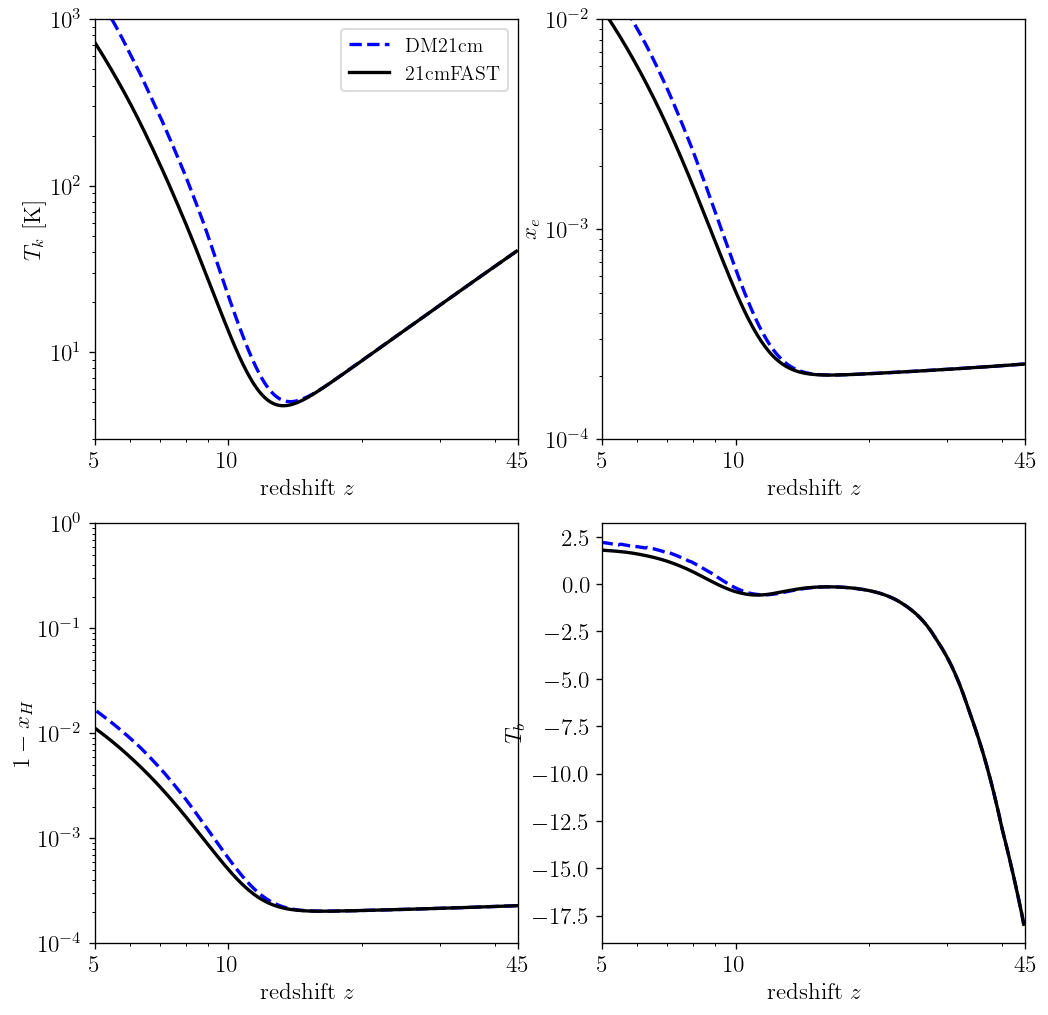

In [5]:
dc_soln = np.load(f'{WDIR}/outputs/dm21cm/{dc_run_name}_records.npy', allow_pickle=True).item()
p21c_soln = np.load(f'{WDIR}/outputs/dm21cm/{p21c_run_name}_records.npy', allow_pickle=True).item()

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Tk
ax = axs[0,0]
ax.plot(dc_soln['z'],   dc_soln['T_k'],   color=color_dict['dc'], label=label_dict['dc'], ls=ls_dict['dc'], lw=2)
ax.plot(p21c_soln['z'], p21c_soln['T_k'], color=color_dict['21'], label=label_dict['21'], ls=ls_dict['21'], lw=2)
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log', yscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(ylabel='$T_k$ [K]', xlabel='redshift $z$')
ax.set(ylim=(3, 1e3))
ax.legend()

# x
ax = axs[0,1]
ax.plot(dc_soln['z'],   dc_soln['x_e'],   color=color_dict['dc'], label=label_dict['dc'], ls=ls_dict['dc'], lw=2)
ax.plot(p21c_soln['z'], p21c_soln['x_e'], color=color_dict['21'], label=label_dict['21'], ls=ls_dict['21'], lw=2)
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log', yscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(ylabel='$x_e$', xlabel='redshift $z$')
ax.set(ylim=(1e-4, 1e-2))

# 1-xH
ax = axs[1,0]
ax.plot(dc_soln['z'],   dc_soln['1-x_H'],   color=color_dict['dc'], label=label_dict['dc'], ls=ls_dict['dc'], lw=2)
ax.plot(p21c_soln['z'], p21c_soln['1-x_H'], color=color_dict['21'], label=label_dict['21'], ls=ls_dict['21'], lw=2)
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log', yscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(ylabel='$1-x_H$', xlabel='redshift $z$')
ax.set(ylim=(1e-4, 1))

# Tb
ax = axs[1,1]
ax.plot(dc_soln['z'],   dc_soln['T_b'],   color=color_dict['dc'], label=label_dict['dc'], ls=ls_dict['dc'], lw=2)
ax.plot(p21c_soln['z'], p21c_soln['T_b'], color=color_dict['21'], label=label_dict['21'], ls=ls_dict['21'], lw=2)
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(ylabel='$T_b$', xlabel='redshift $z$')

#fig.suptitle(r"Pop2_ion$=0$", fontsize=18)

fig.savefig(f'{save_name}.pdf', bbox_inches='tight')

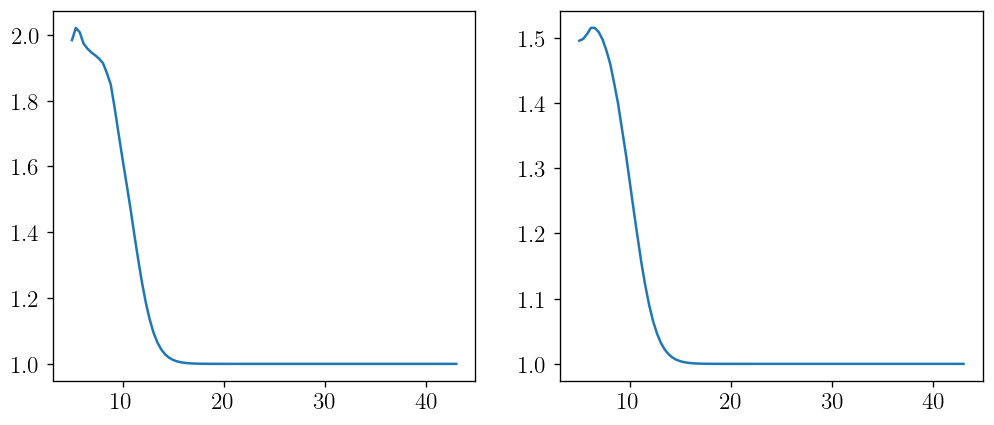

In [6]:
# relative error: not formatted
z_s = np.linspace(5, 43, 100)
T_dc_s = np.interp(z_s, dc_soln['z'][::-1], dc_soln['T_k'][::-1])
T_p21c_s = np.interp(z_s, p21c_soln['z'][::-1], p21c_soln['T_k'][::-1])

x_dc_s = np.interp(z_s, dc_soln['z'][::-1], dc_soln['x_e'][::-1])
x_p21c_s = np.interp(z_s, p21c_soln['z'][::-1], p21c_soln['x_e'][::-1])

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(z_s, T_dc_s/T_p21c_s)
axs[1].plot(z_s, x_dc_s/x_p21c_s)

### 3.2.1 V21: Check xray energy

In [3]:
from scipy import interpolate
import astropy.units as u
from dm21cm.physics import dt_step
from dm21cm.utils import load_h5_dict

sys.path.append(os.environ['DH_DIR'])
from darkhistory.spec.spectrum import Spectrum

res_dict = np.load('../data/xraycheck/Interpolators_0926_2.npz', allow_pickle=True)
z_range, delta_range, r_range = res_dict['SFRD_Params']
cond_sfrd_table = res_dict['Cond_SFRD_Table']
st_sfrd_table =  res_dict['ST_SFRD_Table']
ST_SFRD_Interpolator = interpolate.interp1d(z_range, st_sfrd_table)

abscs = load_h5_dict("../data/abscissas/abscs_zf01.h5")

def inj_xray_eng(z):
    # copyied from DH which agrees with DC
    delta = 0.
    dlnz = np.log(1.01)
    dt = dt_step(z, np.exp(dlnz))
    emissivity_bracket = ST_SFRD_Interpolator(z) # [Msun / (cMpc^3 s)]
    emissivity_bracket *= (1 + delta) / (phys.n_B * u.cm**-3).to('Mpc**-3').value * dt # [Msun / (cMpc^3 s)] * [s cMpc^3]

    L_X_spec_prefac = 1e40 / np.log(4) * u.erg * u.s**-1 * u.M_sun**-1 * u.yr * u.keV**-1 # value in [erg yr / s Msun keV]
    # L_X (E * dN/dE) \propto E^-1
    L_X_dNdE = L_X_spec_prefac.to('1/Msun').value * (abscs['photE']/1000.)**-1 / abscs['photE'] # [1/Msun] * [1/eV] = [1/Msun eV]
    
    xray_eng_lo = 0.5 * 1000 # [eV]
    xray_eng_hi = 10.0 * 1000 # [eV]
    xray_i_lo = np.searchsorted(abscs['photE'], xray_eng_lo)
    xray_i_hi = np.searchsorted(abscs['photE'], xray_eng_hi)

    L_X_dNdE[:xray_i_lo] *= 0.
    L_X_dNdE[xray_i_hi:] *= 0.
    L_X_spec = Spectrum(abscs['photE'], L_X_dNdE, spec_type='dNdE', rs=1+z) # [1 / Msun eV]
    L_X_spec.switch_spec_type('N') # [1 / Msun]
    L_X_spec *= emissivity_bracket

    return L_X_spec.toteng() # [eV/Bavg]

In [4]:
dc_soln = np.load(f'{WDIR}/outputs/dm21cm/{dc_run_name}_records.npy', allow_pickle=True).item()
p21c_soln = np.load(f'{WDIR}/outputs/dm21cm/{p21c_run_name}_records.npy', allow_pickle=True).item()

NameError: name 'dc_run_name' is not defined

In [5]:
from dm21cm.evolve import debug_get_21totf_interp

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:58: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:42: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


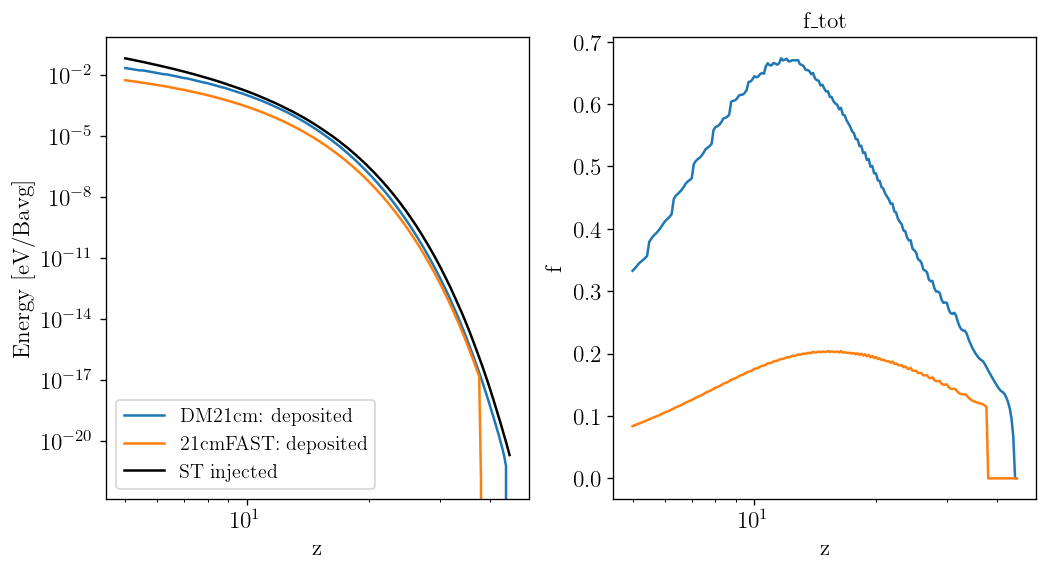

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

ax = axs[0]

z_arr = dc_soln['z']
dep_eng_tot = dc_soln['dep_heat'] + dc_soln['dep_ion'] + dc_soln['dep_exc']
ax.plot(z_arr, dep_eng_tot, label='DM21cm: deposited')

p21c_dep_eng_interp = debug_get_21totf_interp("../outputs/stdout/xc_nopop2_noHe_nosp_noatten_esf.out")
p21c_dep_xray_eng_arr = np.array([p21c_dep_eng_interp(z) for z in z_arr])
ax.plot(z_arr, p21c_dep_xray_eng_arr, label='21cmFAST: deposited')

inj_xray_eng_arr = np.array([inj_xray_eng(z) for z in z_arr])
ax.plot(z_arr, inj_xray_eng_arr, color='k', label='ST injected')

ax.set(yscale='log', xscale='log')
ax.set(xlabel='z', ylabel='Energy [eV/Bavg]')
ax.legend()

ax = axs[1]
ax.plot(z_arr, dep_eng_tot/inj_xray_eng_arr)
ax.plot(z_arr, p21c_dep_xray_eng_arr/inj_xray_eng_arr)
ax.set(title='f_tot', xscale='log')
ax.set(xlabel='z', ylabel='f');

In [4]:
dNdE = abscs['photE']**-2
i_lo = np.searchsorted(abscs['photE'], 0.5*1000)
i_hi = np.searchsorted(abscs['photE'], 10*1000)
dNdE[:i_lo] *= 0.
dNdE[i_hi:] *= 0.
s_full = Spectrum(abscs['photE'], 1e8*dNdE, spec_type='dNdE', rs=1)
i_dep = np.searchsorted(abscs['photE'], 0.76*1000)
dNdE_dep = dNdE.copy()
dNdE_dep[:i_dep] *= 0.
s_dep = Spectrum(abscs['photE'], 1e8*dNdE_dep, spec_type='dNdE', rs=1)
print(s_dep.toteng()/s_full.toteng())

0.8717948717948718


In [5]:
from dm21cm.dh_wrappers import TransferFunctionWrapper
tf_version = 'zf01'
tf_prefix = f"{os.environ['DM21CM_DATA_DIR']}/tf/{tf_version}"
tf_wrapper = TransferFunctionWrapper(
    box_dim = 32,
    abscs = abscs,
    prefix = tf_prefix,
    enable_elec = False,
)

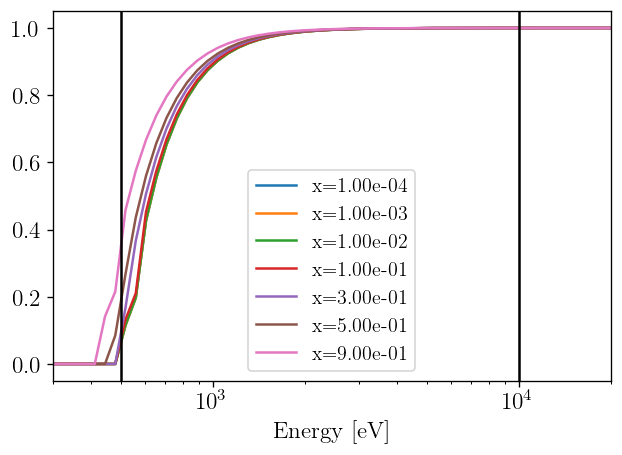

In [6]:
z = 15
for x in [1e-4, 1e-3, 1e-2, 1e-1, 0.3, 0.5, 0.9]:
    a_arr = tf_wrapper.attenuation_arr(rs=1+z, x=x)
    plt.plot(abscs['photE'], a_arr, label=f'x={x:.2e}')
plt.xlim(3e2, 2e4)
plt.axvline(5e2, color='k')
plt.axvline(1e4, color='k')
plt.xscale('log')
plt.xlabel('Energy [eV]')
plt.legend()

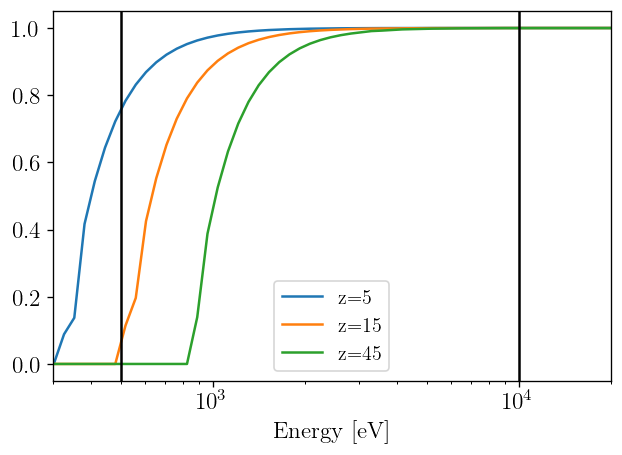

In [ ]:
for z in [5, 15, 45]:
    a_arr = tf_wrapper.attenuation_arr(rs=1+z, x=1e-3)
    plt.plot(eng, a_arr, label=f'z={z}')
plt.xlim(3e2, 2e4)
plt.axvline(5e2, color='k')
plt.axvline(1e4, color='k')
plt.xscale('log')
plt.xlabel('Energy [eV]')
plt.legend()

In [7]:
import astropy.constants as const

In [9]:
(1.208995e+17 * u.Hz * const.h).to('eV')

<Quantity 500.00015672 eV>

In [ ]:
eng = abscs['photE']
plt.plot(eng, dNdE*eng**2)
plt.ylim(0.9, 1.1)
plt.xlim(1e2, 1e4)
plt.loglog()

In [ ]:
dc_soln['dep_heat'] / dc_soln['dE_inj_per_Bavg_unclustered']

In [ ]:
# relative error: not formatted
z_s = np.linspace(5, 43, 100)
T_21_s = np.interp(z_s, dc_soln['z'][::-1], dc_soln['T_k'][::-1])
T_dh_s = np.interp(z_s, dh_soln['rs'][::-1] - 1, dh_soln['Tm'][::-1]/phys.kB)

x_21_s = np.interp(z_s, dc_soln['z'][::-1], dc_soln['x_e'][::-1])
x_dh_s = np.interp(z_s, dh_soln['rs'][::-1] - 1, dh_soln['x'][::-1, 0])

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(z_s, T_dh_s/T_21_s)
axs[1].plot(z_s, x_21_s/x_dh_s)

In [9]:
plot_names = [
    #('dc', 'xc_xray_noLX_nos8_noHe_nosp'),
    #('dc', 'xc_xray_noLX_nos8_noHe_nosp_noatten'),
    #('dc', 'xc_xray_noLX_noHe_nosp'),
    #('dc', 'xc_xray_noLX_noHe_nosp_noatten'),
    ('dc', 'xc_xray_noLX_noHe_nosp_noatten_21totf_esf'),
    ('dc', 'xc_xray_noLX_noHe_nosp_noatten_21totf'),
    ('dc', 'xc_noHe_nosp'),
    ('dh', 'xc_xrayST_noHe'),
]
save_name = 'xc_xray_nos8_noHe_nosp'

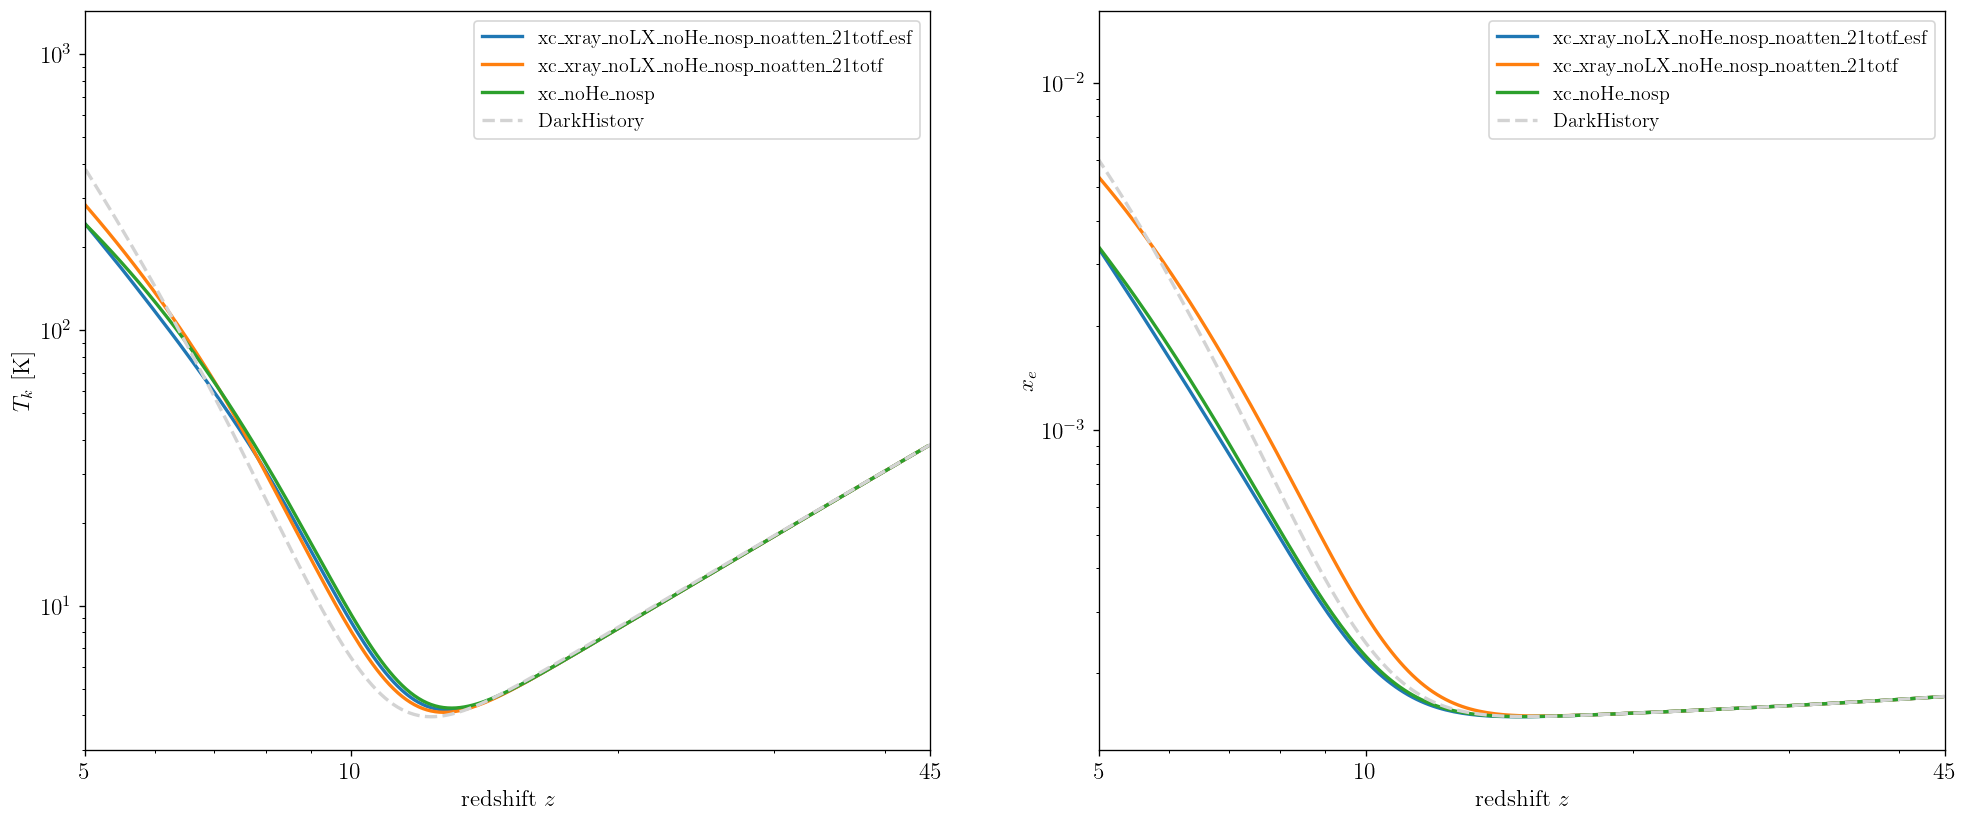

In [10]:
soln_s = []
for soln_type, run_name in plot_names:
    if soln_type == 'dc':
        soln = np.load(f'{WDIR}/outputs/dm21cm/{run_name}_records.npy', allow_pickle=True).item()
    elif soln_type == 'dh':
        soln = pickle.load(open(f'{WDIR}/outputs/dh/{run_name}_soln.p', 'rb'))
        i_z_st_dh = np.argmin(np.abs(soln['rs']-1 - z_plot_max))
    soln_s.append(soln)

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Tk
ax = axs[0]
i_dc = 0
for soln, (soln_type, run_name) in zip(soln_s, plot_names):
    if soln_type == 'dc':
        ax.plot(soln['z'], soln['T_k'], color=f'C{i_dc}', label=run_name, ls=ls_dict['21'], lw=2)
        i_dc += 1
    elif soln_type == 'dh':
        ax.plot(soln['rs'][i_z_st_dh:] - 1, soln['Tm'][i_z_st_dh:]/phys.kB, color=color_dict['dh'], label=label_dict['dh'], ls=ls_dict['dh'], lw=2)
        
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log', yscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(xlabel='redshift $z$', ylabel='$T_k$ [K]')
ax.legend()

# x
ax = axs[1]
i_dc = 0
for soln, (soln_type, run_name) in zip(soln_s, plot_names):
    if soln_type == 'dc':
        ax.plot(soln['z'], soln['x_e'], color=f'C{i_dc}', label=run_name, ls=ls_dict['21'], lw=2)
        i_dc += 1
    elif soln_type == 'dh':
        ax.plot(soln['rs'][i_z_st_dh:] - 1, soln['x'][i_z_st_dh:, 0], color=color_dict['dh'], label=label_dict['dh'], ls=ls_dict['dh'], lw=2)

ax.set(xlim=(z_plot_min, z_plot_max), xscale='log', yscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(xlabel='redshift $z$', ylabel='$x_e$')

#ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.legend()

fig.savefig(f'{save_name}.pdf', bbox_inches='tight')